# Prostate-specific antigen (PSA) analysis

## In brevi

Prostate-specific antigen (PSA) is produced for the ejaculate, where it liquifies the semen in the seminal coagulum and allows sperm to swim freely (Balk et.al. 2003). PSA is present in small quantities in the serum of men with healthy prostates, but is often elevated in the presence of prostate cancer or other prostate disorders (Catalona et.al. 1994).

I was diagnosed with prostate cancer on 2013-03-08. I had a radical prostatectomy on 2013-06-11 and 30 radiation treatments from 2013-09-13 to 2013-10-18.

From an initial PSA test immediately after the last radiation treatment and every six months since, I have recorded the date, results, and consulting physician. These results are analysed in this Jupyter notebook.

This Jupyter Notebook creates two scatter plots:

1. PSA v. Date, using the full range of the data to set the y axis limits.
2. PSA v. Date, using the *trigger point* of 3.0 to set the y axis limits. This upper limit is the point at which the doctors said I would need further treatment if my PSA results were to reach this value.

## Methodology

TBD

## Data

Download the two data files:

- [PSA results from Dr. Proudlove](https://drive.google.com/open?id=0BzrdQfHR2I5DdHNFMWtSQ3JSclE)
- [PSA results from Dr. Perry](https://drive.google.com/open?id=0BzrdQfHR2I5DdF9pRUM1c1FZZmM)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
psa_proudlove = pd.read_csv('psa_proudlove.csv', parse_dates=True, index_col='Date')
psa_perry = pd.read_csv('psa_perry.csv', parse_dates=True, index_col='Date')

In [3]:
title = 'Prosate-specific Antigen (PSA) Test'
max_date = max(psa_proudlove.index.max(),
               psa_perry.index.max()).date().isoformat()
subtitle = f'Gilles Pilon {max_date}'
yaxislabel = 'PSA (ng/mL)'
xaxislabel = 'Date'

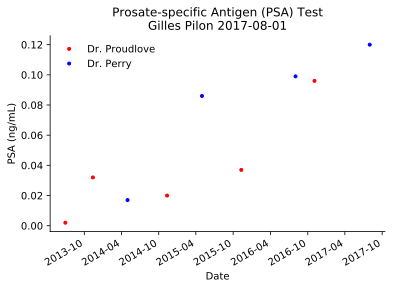

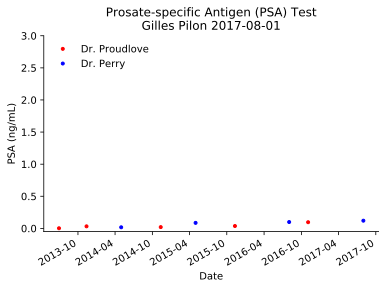

In [4]:
for ylim, filename in (None, 'gilles_psa'), ((-0.05, 3), 'gilles_psa_max'):
    # Create a subplot and the first scatter plot.
    ax = psa_proudlove.plot(y='PSA', color='red', style='.', label='Dr. Proudlove')
    # Add another scatter plot.
    psa_perry.plot(y='PSA', color='blue', style='.', label='Dr. Perry', ax=ax)
    # Remove the top and right spines.
    for spine in 'right', 'top':
        ax.spines[spine].set_color('none')
    # Add the title and subtitle.
    ax.set_title(title + '\n' + subtitle)
    # Add the Y axis label.
    ax.set_ylabel(yaxislabel)
    # Add the X axis label.
    ax.set_xlabel(xaxislabel)
    # Use autoscale to prevent points being clipped by the axes.
    ax.autoscale(tight=False)
    if ylim is not None:
    # Draw a target line if required.
    #    ax.axhline(y=2)
        ax.set_ylim(*ylim)
    # Draw a legend without a frame.
    ax.legend(loc='upper left', frameon=False)
    # Save the graphs in svg and pdf formats.
    ax.figure.savefig(f'{filename}.svg', format='svg')
    ax.figure.savefig(f'{filename}.pdf', format='pdf')

## References

Balk, S.P. Y.J. Ko, and G.J. Bubley. "Biology of prosate-specific antigen." *Journal of Clinical Oncology* 21 (January 2003), no. 2: 383-91. [PMID 12525533 (https://www.ncbi.nlm.nih.gov/pubmed/12525533)](https://www.ncbi.nlm.nih.gov/pubmed/12525533). [doi:10.1200/JCO.2003.02.083 (https://doi.org/10.1200 2FJCO.2003.02.083)](https://doi.org/10.1200/JCO.2003.02.083).

Catalona, W.J., J.P. Richie, F.R. Ahmann, M.A. Hudson, P.T. Scardino, R.C. Flanigan, J.B. deKernion, T.L. Ratliff, L.R. Kavoussi, and B.L. Dalkin. "Comparison of digital rectal examination and serum prostate specific antigen in the early detection of prostate cancer: results of a multicenter clinical trial of 6,630 mean." *The Journal of Urology* 151 (May 1994), no. 5: 1283-90. [PMID 7512659 (https://www.ncbi.nlm.nih.gov/pubmed/7512659)](https://www.ncbi.nlm.nih.gov/pubmed/7512659).
